## Predicting Churn Customers

### Business Question: 
How can we reduce customer churn in the bank's credit card services by identifying customers at risk of leaving and providing them with targeted services to encourage them to stay?

### Data Description:

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate it, if one could predict for them who is going to get churned so they can proactively go to the customer to provide them better services and turn customers decisions in the opposite direction. 

# Load libraries

In [30]:
# Import the libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold


import warnings
warnings.filterwarnings("ignore")

## Read the dataset

In [2]:
# Load the dataset
data = pd.read_csv("C:/Users/sravani/Downloads/BankChurners.csv/BankChurners.csv")

# Data Exploration

In [3]:
# No of rows and columns
data.shape

(10127, 23)

In [4]:
# Calculate summary statistics for numeric columns
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [5]:
# Descriptive analysis for categorical data
data.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [6]:
# List of columns to remove
columns_to_remove = ['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

# Remove the specified columns
data = data.drop(columns=columns_to_remove)

CLIENTNUM is a unique identifier it does not help much in prediction of the models.

In [7]:
# Splitting columns into Categorical and Numerical Feature Lists 
categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

In [8]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

The target variable is "Attrition_Flag," which has two classes: "Existing Customer" and "Attrited Customer." A binary classification problem involves predicting one of two possible outcomes for a given input.

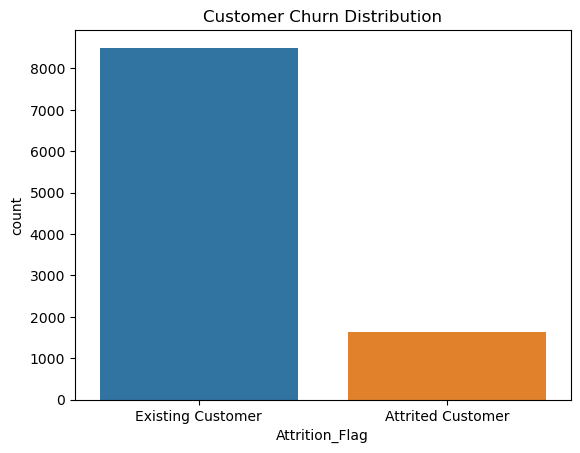

In [9]:
# Perform exploratory data analysis (EDA)
# Visualize the distribution of features and their relationships with customer churn

# Plot the distribution of the target variable
sns.countplot(x='Attrition_Flag', data=data)
plt.title("Customer Churn Distribution")
plt.show()

Countplot shows the distribution of the target variable "Attrition_Flag," which represents customer churn ("Existing Customer" or "Attrited Customer"). It counts the number of instances in each category and visualizes it as a bar chart.

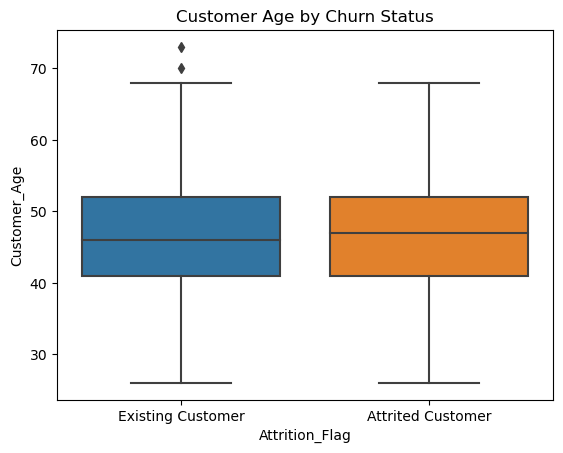

In [10]:
# Explore feature distributions and relationships
# Example: Boxplot of customer age by churn status
#Explore the relationships between the "Attrition_Flag" (churn status) and the "Customer_Age" feature using a boxplot.
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=data)
plt.title("Customer Age by Churn Status")
plt.show()

This boxplot displays the distribution of customer ages for both existing and attrited customers.
The boxplot allows to compare the distribution of ages for both customer groups. 

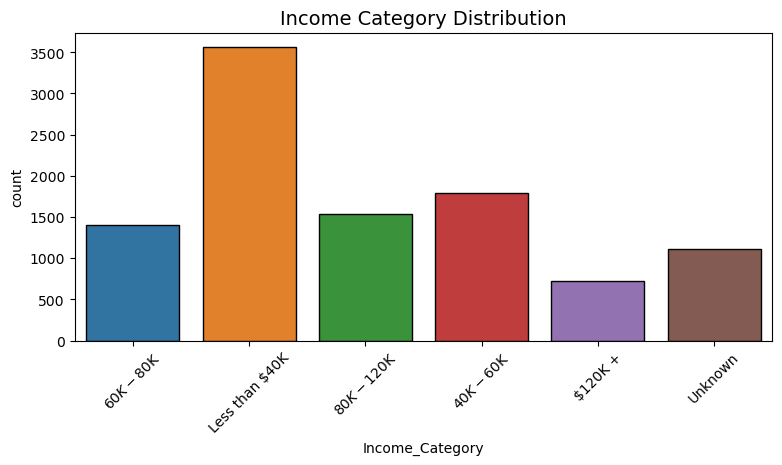

In [11]:
# Define a custom color palette
#Countplot to visualize the distribution of income categories in the dataset
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
plt.figure(figsize=(9, 4))
sns.countplot(data=data, x='Income_Category', palette=custom_palette, edgecolor='black')
plt.title("Income Category Distribution", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

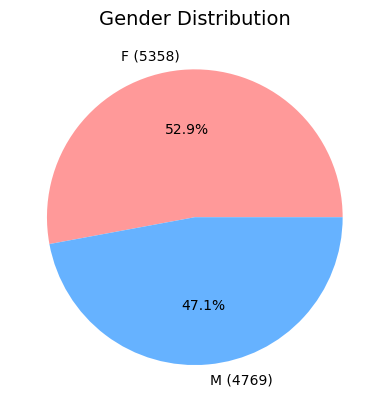

In [12]:
# The distribution of genders,
gender_counts = data['Gender'].value_counts()

# Define custom colors
custom_colors = ['#FF9999', '#66B2FF']

# Create labels with count
labels = [f"{gender} ({count})" for gender, count in zip(gender_counts.index, gender_counts)]

plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=custom_colors)
plt.title('Gender Distribution', fontsize=14)
plt.show()

The counts for each gender category.Female count is 5358 and male count is 4768.

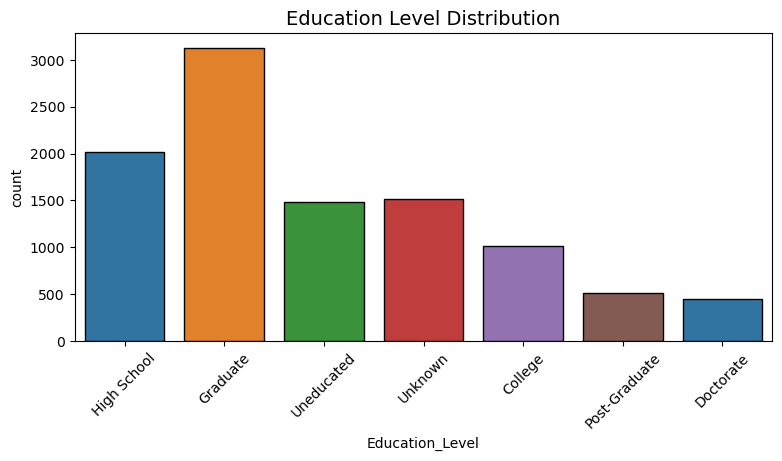

In [13]:
# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

plt.figure(figsize=(9, 4))
sns.countplot(data=data, x='Education_Level', palette=custom_palette, edgecolor='black')
plt.title("Education Level Distribution", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

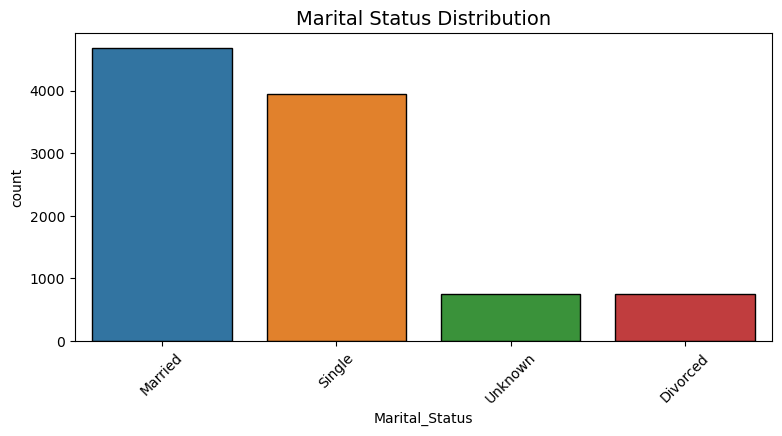

In [14]:
# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
#The distribution of marital statuses in the dataset
plt.figure(figsize=(9, 4))
sns.countplot(data=data, x='Marital_Status', palette=custom_palette, edgecolor='black')
plt.title("Marital Status Distribution", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

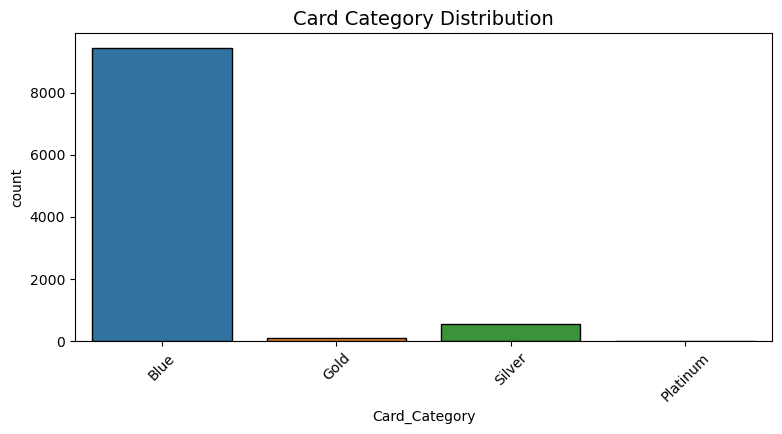

In [15]:
# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
#The distribution of card category in the dataset
plt.figure(figsize=(9, 4))
sns.countplot(data=data, x='Card_Category', palette=custom_palette, edgecolor='black')
plt.title("Card Category Distribution", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Data Pre-Processing

In [16]:
#Find if null values exist in the dataset
null_values = data.isna().sum()
# Display the count of null values for each column
print(null_values)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


Dataset does not contain any missing values.

In [17]:
print(data.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [18]:
# Working with Ordinal Features with pandas `map` method.

attrition_flag_dictionary = {'Existing Customer' : 0, 'Attrited Customer' : 1}

edu_level_dictionary = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3
                 , 'Post-Graduate': 4, 'Graduate': 5, 'Doctorate': 6} 

income_cat_dictionary = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3
                  , '$80K - $120K': 4 ,'$120K +': 5}

card_cat_dictionary = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}

data['Attrition_Flag'] = data['Attrition_Flag'].map(attrition_flag_dictionary)

data['Education_Level'] = data['Education_Level'].map(edu_level_dictionary)

data['Income_Category'] = data['Income_Category'].map(income_cat_dictionary)

data['Card_Category'] = data['Card_Category'].map(card_cat_dictionary)

data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,5,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,5,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,2,Unknown,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,1,Married,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [19]:
# Working with Nominal Features with pandas `get_dummies` function.
data = pd.get_dummies(data, columns=['Gender', 'Marital_Status'])

encoded = list(data.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

24 total features after one-hot encoding.


### Handling Outliers

In [20]:
# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for numerical features
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Setting a threshold for identifying outliers (e.g., 2.5 times the IQR)
threshold = 2.5

# Calculating the lower bound and upper bound for outliers based on the threshold
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

In [21]:
# Detecting Outliers in each column 
for column in numerical_features:
    column_outliers = data[(data[column] < lower_bound[column]) | (data[column] > upper_bound[column])]
    print(f"Feature '{column}' has == {len(column_outliers)} outliers.")

Feature 'Customer_Age' has == 0 outliers.
Feature 'Dependent_count' has == 0 outliers.
Feature 'Months_on_book' has == 0 outliers.
Feature 'Total_Relationship_Count' has == 0 outliers.
Feature 'Months_Inactive_12_mon' has == 124 outliers.
Feature 'Contacts_Count_12_mon' has == 54 outliers.
Feature 'Credit_Limit' has == 579 outliers.
Feature 'Total_Revolving_Bal' has == 0 outliers.
Feature 'Avg_Open_To_Buy' has == 575 outliers.
Feature 'Total_Amt_Chng_Q4_Q1' has == 155 outliers.
Feature 'Total_Trans_Amt' has == 747 outliers.
Feature 'Total_Trans_Ct' has == 0 outliers.
Feature 'Total_Ct_Chng_Q4_Q1' has == 123 outliers.
Feature 'Avg_Utilization_Ratio' has == 0 outliers.


In [22]:
# Create a boolean mask to identify rows containing outliers
outliers_mask = ((data[numerical_features] < lower_bound) | (data[numerical_features] > upper_bound)).any(axis=1)

print(f"Dataset Before Minimizing Outliers {data.shape}\n")

# Remove rows with outliers from the DataFrame
data = data[~outliers_mask]

# Display the DataFrame without outliers
print(f"Dataset After Minimizing Outliers {data.shape}")

Dataset Before Minimizing Outliers (10127, 24)

Dataset After Minimizing Outliers (8493, 24)


### Split the data into train and test sets 

In [23]:
# Split the data into training and testing sets
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X.shape, y.shape

((8493, 23), (8493,))

In [25]:
y_train.value_counts()

0    5631
1    1163
Name: Attrition_Flag, dtype: int64

### Handle Imbalanced Data

In [26]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Show the results after oversampling
print("Training set after oversampling has {} samples".format(len(y_train_resampled)))
print(y_train_resampled.value_counts())


Training set after oversampling has 11262 samples
0    5631
1    5631
Name: Attrition_Flag, dtype: int64


In [27]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the StandardScaler on the training data
scaler.fit(X_train[numerical_features])

# Transforming (standardize) the continuous features in the training and testing data
X_train_cont_scaled = scaler.transform(X_train[numerical_features])
X_test_cont_scaled = scaler.transform(X_test[numerical_features])

# Replacing the scaled continuous features in the original data
X_train[numerical_features] = X_train_cont_scaled
X_test[numerical_features] = X_test_cont_scaled

X_train

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
6917,0.200401,0.514312,3,1,0,-0.737570,0.043067,-1.407629,-1.343840,-0.600484,...,0.586021,0.860473,0.313829,0.836540,1,0,0,0,1,0
5198,-0.545913,1.281432,5,0,0,0.009957,-0.621927,0.745812,-1.343840,-0.613208,...,0.620491,1.563365,0.308835,1.222170,1,0,1,0,0,0
6703,1.195488,-0.252809,1,4,0,1.629600,0.708061,0.745812,-0.418528,-0.201733,...,0.486058,0.860473,0.938026,-1.045616,0,1,0,0,1,0
7029,1.319874,-1.019929,2,5,0,1.380424,0.043067,1.822533,-0.418528,0.381753,...,0.609001,1.362539,0.613443,-0.670600,0,1,0,0,1,0
1288,1.941803,-1.787049,5,0,0,0.009957,0.708061,-0.330909,1.432095,-0.599717,...,0.205130,0.609440,-0.595002,1.770542,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,-0.421528,0.514312,5,3,0,-0.363806,0.043067,-0.330909,0.506783,0.011057,...,0.568211,0.509027,0.313829,-1.045616,0,1,0,0,1,0
5798,0.324787,-1.019929,2,2,0,0.882072,-0.621927,0.745812,-0.418528,-0.571509,...,0.500421,1.312333,-0.005760,-0.065621,1,0,1,0,0,0
6008,1.071102,0.514312,5,0,0,1.131248,-1.951915,0.745812,-1.343840,-0.608149,...,-0.557800,-1.649856,-1.214206,1.275238,1,0,0,1,0,0
1071,0.822330,0.514312,2,0,0,1.131248,0.708061,-1.407629,0.506783,-0.657207,...,-1.308667,-1.549443,-1.084373,0.875457,1,0,0,1,0,0


### Feature Scaling

### Models training and Evaluation

In [32]:
# Below is the classification models we will be using
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

In [33]:
# Creating lists for classifier names, test_accuracy_scores and their F1 scores.
classifier_names = []
test_accuracy_scores = []
f1_scores = []

# Looping through classifiers, fitting models, and calculating train and test accuracy
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    classifier_names.append(name)
    
    # Calculating and storing F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    
    # Calculating and storing test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracy_scores.append(test_accuracy)

    # Printing model details
    print(f'Model: {name}')
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print('------------------------------------------------------------------')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('------------------------------------------------------------------')
    print(f'Testing Classification report: \n{classification_report(y_test, y_pred)}')
    print('------------------------------------------------------------------')

Model: Logistic Regression
Training Accuracy: 0.9047689137474242
Testing Accuracy: 0.9140670982931136
------------------------------------------------------------------
Testing Confusion Matrix: 
[[1366   52]
 [  94  187]]
------------------------------------------------------------------
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1418
           1       0.78      0.67      0.72       281

    accuracy                           0.91      1699
   macro avg       0.86      0.81      0.83      1699
weighted avg       0.91      0.91      0.91      1699

------------------------------------------------------------------
Model: Decision Tree
Training Accuracy: 1.0
Testing Accuracy: 0.9440847557386698
------------------------------------------------------------------
Testing Confusion Matrix: 
[[1359   59]
 [  36  245]]
------------------------------------------------------------------
Testing Classif

In [1]:
#pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/1b/10/3c0635997d16a476dba4e3ab04ba47462cdef002e43bf3067395eac0a4e0/xgboost-2.0.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
